In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
from math import exp, fabs, sqrt, log, pi
import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.callbacks import ProgbarLogger
from keras.layers import Dense
from keras.callbacks import Callback, LambdaCallback
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
seed = 42
np.random.seed(seed)

### Load data

In [6]:
X, y = readAggrData()
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

### Define model

In [7]:
def baseline_model():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [30]:
class PeriodicLogger(Callback):  

    def on_train_begin(self, logs={}):    
        # Initialization code    
        self.epochs = 0    

    def on_epoch_end(self, batch, logs={}):    
        self.epochs += 1     
        if self.epochs % 100 == 0:
            print(self)

In [31]:
nn_bl = baseline_model()

In [74]:
hist = nn_bl.fit(
    X_train, y_train,
    batch_size=1000, nb_epoch=10000, 
    verbose=0
    , callbacks=[LambdaCallback(on_epoch_end=lambda epoch, logs: print(epoch, logs) if (epoch % 500 == 0) else 0)]
)

0 {'loss': 9591357284970.6348}
500 {'loss': 9564705091247.3066}


KeyboardInterrupt: 

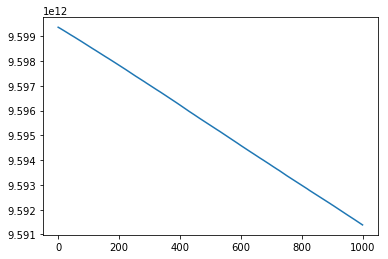

In [72]:
plt.plot(hist.history['loss'])

In [73]:
rmse = sqrt(mean_squared_error(y_test, nn_bl.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'36 days, 6:07:35.823814'

In [49]:
str(datetime.timedelta(seconds=sqrt(104873872129345)))

'118 days, 12:39:54.506743'

In [46]:
3013823**2

9083129075329

## Wider topology 

In [75]:
def wide_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [76]:
nn_bl2 = wide_model()

In [77]:
hist = nn_bl2.fit(
    X_train, y_train,
    batch_size=1000, nb_epoch=10000, 
    verbose=0
    , callbacks=[LambdaCallback(on_epoch_end=lambda epoch, logs: print(epoch, logs) if (epoch % 500 == 0) else 0)]
)

0 {'loss': 128300644609359.72}
500 {'loss': 128021278371425.47}
1000 {'loss': 127317470151843.34}
1500 {'loss': 126212169886007.39}
2000 {'loss': 124718010270106.09}
2500 {'loss': 122848101022535.72}
3000 {'loss': 120618438385195.66}


KeyboardInterrupt: 

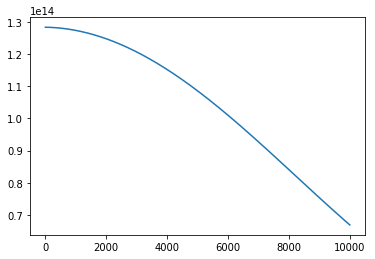

In [62]:
plt.plot(hist.history['loss'])

In [63]:
rmse = sqrt(mean_squared_error(y_test, nn_bl2.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'94 days, 23:17:06.749802'